In [1]:
import sys

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

from evaluation.deviations_evalaution_metrics import load_results, DeviationEvaluation

In [2]:
# Load deviation prediction results:
path_pred_deviations = "../2_conformance_prediction/results/Helpdesk/deviation_predictions.pkl"

# Evaluation deviation labels

In [3]:
deviation_results_evaluation = load_results(path=path_pred_deviations)
eval = DeviationEvaluation(deviation_results=deviation_results_evaluation)

In [4]:
# Only evaluate labels that are in the target set!
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_dev()
print("Precision macro dev: ", precision_macro)
print("Precision macro dev per label: ", precision_per_label)
print("Recall macro dev: ", recall_macro)
print("Recall macro dev per label: ", recall_per_label)

Precision macro dev:  0.11907693953886522
Precision macro dev per label:  {('>>', 'Assign seriousness'): 0, ('Create SW anomaly', '>>'): 0.0, ('Require upgrade', '>>'): 0.03676470588235294, ('Resolve ticket', '>>'): 0.1310344827586207, ('Take in charge ticket', '>>'): 0.2018348623853211, ('Wait', '>>'): 0.3448275862068966}
Recall macro dev:  0.5545636299504392
Recall macro dev per label:  {('>>', 'Assign seriousness'): 0.0, ('Create SW anomaly', '>>'): 0.0, ('Require upgrade', '>>'): 0.8333333333333334, ('Resolve ticket', '>>'): 0.8837209302325582, ('Take in charge ticket', '>>'): 0.9361702127659575, ('Wait', '>>'): 0.6741573033707865}


In [5]:
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_no_dev()
print("Precision macro no dev: ", precision_macro)
print("Precision macro per label no dev: ", precision_per_label)
print("Recall macro no dev: ", recall_macro)
print("Recall macro per label no dev: ", recall_per_label)

Precision macro no dev:  0.9983298889432747
Precision macro per label no dev:  {('>>', 'Assign seriousness'): 0.9984276729559748, ('Create SW anomaly', '>>'): 0.9996027016289233, ('Require upgrade', '>>'): 0.9995598591549296, ('Resolve ticket', '>>'): 1.0, ('Take in charge ticket', '>>'): 0.999140154772141, ('Wait', '>>'): 0.9932489451476794}
Recall macro no dev:  0.9449237207877994
Recall macro per label no dev:  {('>>', 'Assign seriousness'): 1.0, ('Create SW anomaly', '>>'): 0.9893826189539914, ('Require upgrade', '>>'): 0.8965653375444137, ('Resolve ticket', '>>'): 0.8994413407821229, ('Take in charge ticket', '>>'): 0.9303442754203363, ('Wait', '>>'): 0.953808752025932}


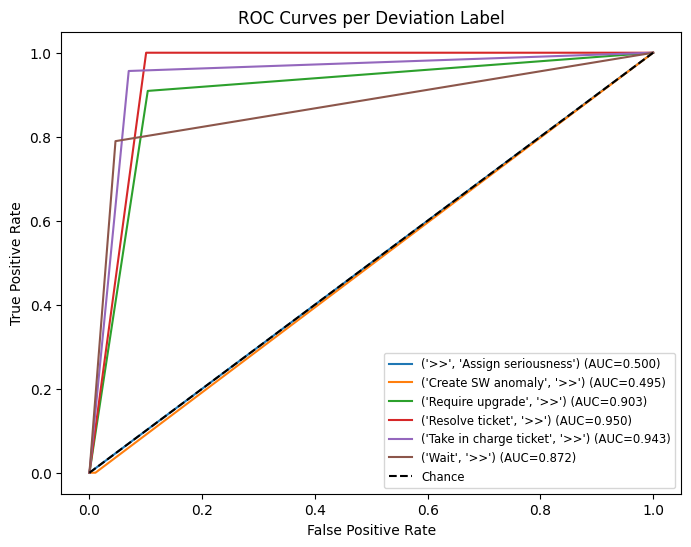

ROC_AUC macro dev per label:  {'per_label_auc': [0.5, 0.4946913094769957, 0.9028281233176614, 0.9497206703910615, 0.9434330072753856, 0.8716412181182291], 'macro_auc': 0.7770523880965555}


In [6]:
roc_auc = eval.plot_macro_roc_auc()
print("ROC_AUC macro dev per label: ",roc_auc)

# Evaluation sequences

In [7]:
# Evaluation of the 

tgt_suff_dev_pos, pred_suff_dev_pos, real_tgt_suffixes, real_pred_suffix_samples = eval.get_suffix_devs()

case_level, per_label_mean, weighted_macro = eval.likelihood_at_target_positions(tgt_suff_dev_poss=tgt_suff_dev_pos, pred_suff_dev_poss=pred_suff_dev_pos)

print("likelihood at correct position in suffix for all deviations: ", per_label_mean)
print("mean likelihood of deviations' correct poistion across all deviations: ", weighted_macro)

print("min:", min(list(per_label_mean.values())))
print("max:", max(list(per_label_mean.values())))

likelihood at correct position in suffix for all deviations:  {'Assign seriousness': 0.0, 'Create SW anomaly': 0.0, 'Require upgrade': 0.08416666666666667, 'Resolve ticket': 0.2924691358024691, 'Take in charge ticket': 0.7722916666666667, 'Wait': 0.23039603960396035}
mean likelihood of deviations' correct poistion across all deviations:  0.34290322580645166
min: 0.0
max: 0.7722916666666667


In [8]:
eval.plot_suffix_deviation_distribution(suffix_index=0,
                                        label='Take in charge ticket',
                                        tgt_suff_dev_poss=tgt_suff_dev_pos,
                                        pred_suff_dev_poss=pred_suff_dev_pos,
                                        pred_suffix_samples=real_pred_suffix_samples)

ValueError: No predicted occurrences found for label 'Take in charge ticket' in suffix 0

# Evaluation unseen deviation labels